# Adaptive exponential leaky Integrate-and-Fire model

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import randint
from random import random

## AELIF
#### τm.(du/dt) = = −( u − u rest ) + ∆T exp((u − θ_rh)/∆T) − Rw + R·I(t) ; If firing:u = u reset .
#### τw.(dw/dt)= a(u − u_rest ) − w + b.τ_w ∑ δ( t − t_f ),

    At each threshold crossing, the adaptation variable w is increased by an amount b.
    
    Adaptation is characterized by two parameters:
       1.the parameter a is the source of subthreshold adaptation,because it couples adaptation to the voltage.
       2.spike-triggered adaptation is controlled by a combination of a and b.
       
    The choice of a and b largely determines the firing patterns of the neuron.


In [2]:
def AELIF(I_init=0.005, gl=0.16, Cm=0.0049, num=1):

    ######### Constants
    U_rest      =   -0.065                      
    U_reset     =   -0.065
    thresh  =   -0.04                      
    delta = 0.01                             #is the sharpness parameter
    tau =  Cm/gl
    tau_w = 0.00001                          
    a = 0.01                                 #firing patterns parameter
    b =250                                   #firing patterns parameter
    

    #########  Setup
    # TIME
    T       =   0.100                       
    dt      =   0.00002                     
    time    =   np.arange(0, T+dt, dt)      
    # VOLTAGE
    U       =   np.empty(len(time))         # array for saving Voltage history
    U[0]    =   U_rest                      # set initial to resting potential
    
    # CURRENT
    I = I_values(I_init=I_init, time=time,num = num)
    
    # Adaptation weights
    W = np.zeros(len(time))
    
    ######### Measurements
    spikes  =   0                           # counter for number of spikes
    ######### Simulation
    for i in range(1, len(time)): 
        
        # use " tau.(du/dt) = -(U(t) -U_rest) + ∆T exp((u − θ_rh)/∆T) − Rw + R.I(t))" to get this equation
        weight =W[i-1]/gl *bool(spikes)
        U[i]=(((U_rest-U[i-1])+delta*math.exp((U[i-1]-thresh)/delta)+I[i]/gl-weight)*dt)/tau+U[i-1]
        
        #use " τ_w.(dw/dt) = a(U(t) -U_rest) -w + b τ_w ∑ δ( t − t_f )" to get this equation
        if( I[i] > 0):    
            W[i] = ((a*(U[i-1] -U_rest) - W[i-1] + b* tau_w*spikes)*dt)/tau_w + W[i-1]
        
        # in case we exceed threshold
        if U[i] >= 0.04:
            U[i-1] = 0.04   # set the last step to spike value
            U[i] = U_reset  # current step is resting membrane potential
            spikes += 1     # count spike
            
    
    return U , spikes , I

def I_values(I_init=0.005, time=None,num = 1):
    I0 = np.zeros(len(time))
    I0[1000:4000] = I_init
    I1 = []

    #Setting the initial current_ I1 
    for i in range(0, len(time)):
        
        var = gauss(I_init,I_init*0.1)
        I1.append(var)

   
    I = [I0,I1]
        
    return I[num-1]

# (F - I ) curve plot
we can have different (F-I) curve plot by changing the amount of τ  (using of C , R=1/gl  =>  τ =R.C)
we compute frequency of our model based on different amount of current => I :[0,0.1]V
In this model, to calculate the frequency, we use the number of spikes instead of the time between two     spikes because the time between two spikes changes over time.


In [3]:
def FI_curve(g,C):
    F = []
    #compute Frequency based on different amount of constant current I by using number of spikes
    I_inp= np.arange(0,1,0.001)
    for i in I_inp:
        U,f,I= AELIF(I_init=i , gl=g, Cm=C) 
        F.append(f+0.005)



    fig1 = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(10, 7))
    plt.subplot(111)
    plt.title("Interactive Leaky Integrate-and-Fire Neuron Simulation")
    fig1.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(I_inp,F,'r--',label="F-I curve")
    plt.legend(loc="lower right")

    # add axis labels
    plt.ylabel("f (1/T)")
    plt.xlabel("I (V)")


# AELIF Neuron Simulation for constant current
we implement (U - t) and (I - t) diagram in one frame ,we assume U_rest= - 65mv and threshold = -50 mv

In [4]:
def AELIF_Model(I_init,gl_init,Cm_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # update functions for lines
    U , f, I= AELIF(I_init=I_init, gl=gl_init, Cm=Cm_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.04

    ######### Plotting
    fig = plt.figure("Adaptive exponential leaky Integrate-and-Fire Neuron Model", figsize=(14, 7))
    plt.subplot(111)
    plt.title("Adaptive exponential leaky Integrate-and-Fire Neuron Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    plt.plot(time, U, label="Potential:U")[0]
    plt.plot(time, I, label="Applied Current:I")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    plt.xlabel("Time [s]")
 

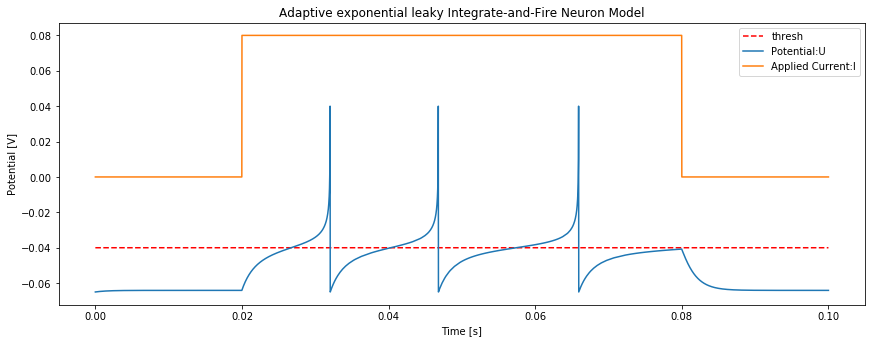

In [5]:
AELIF_Model(0.08,4.7,0.0067)

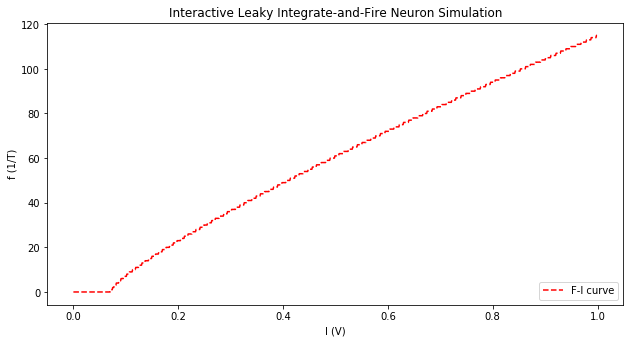

In [6]:
FI_curve(4.7,0.0067)

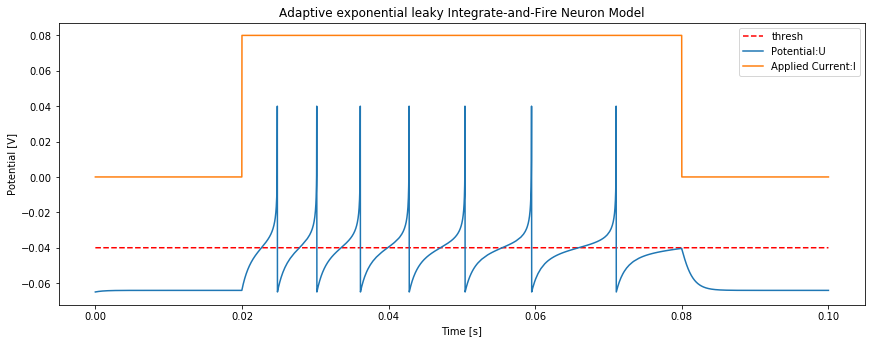

In [7]:
AELIF_Model(0.08,4,0.004)

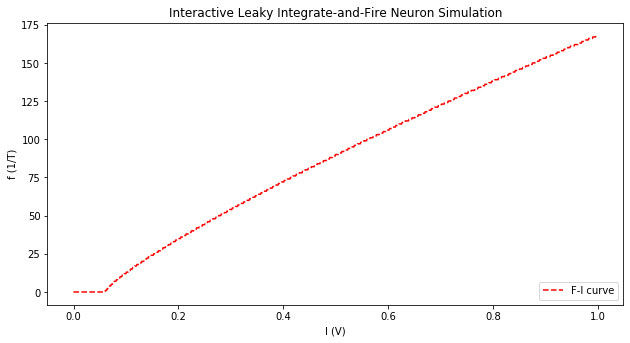

In [8]:
FI_curve(4,0.004)

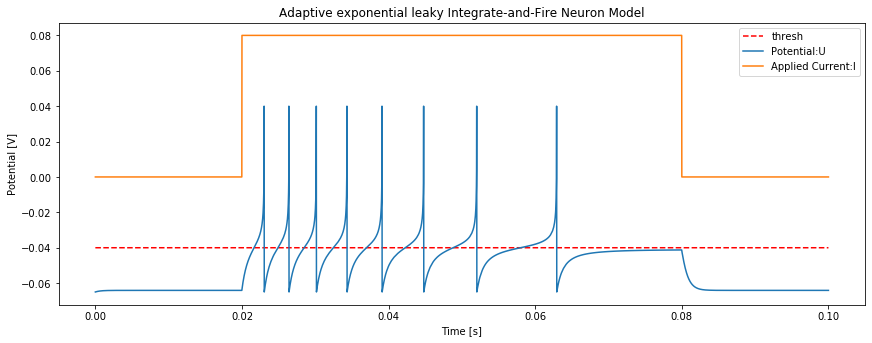

In [9]:
AELIF_Model(0.08,4,0.0025)

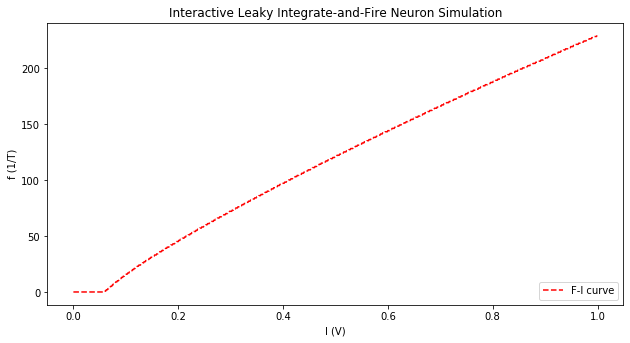

In [10]:
FI_curve(4,0.0025)

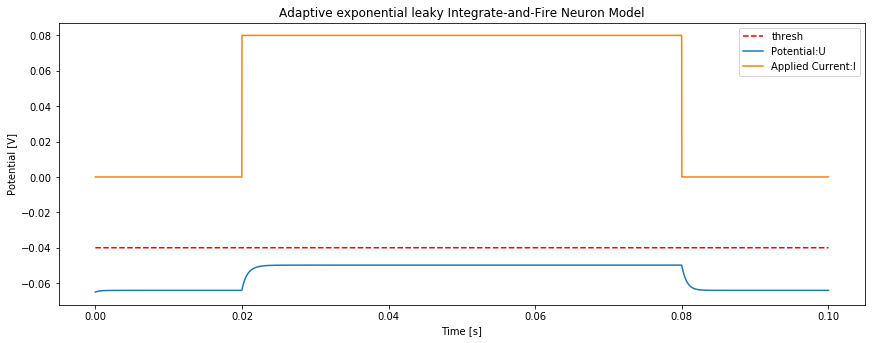

In [11]:
AELIF_Model(0.08,7,0.004)

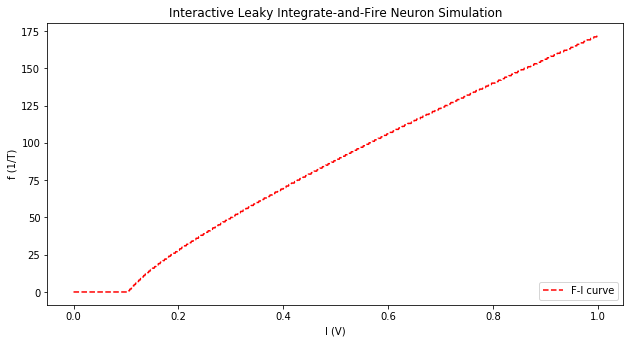

In [12]:
FI_curve(7,0.004)

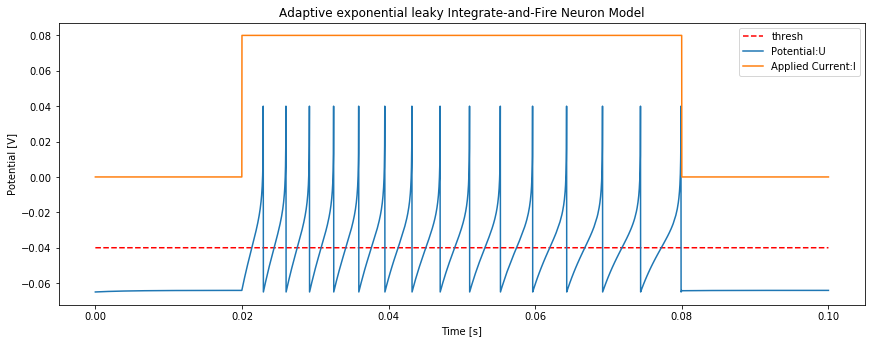

In [13]:
AELIF_Model(0.08,1,0.004)

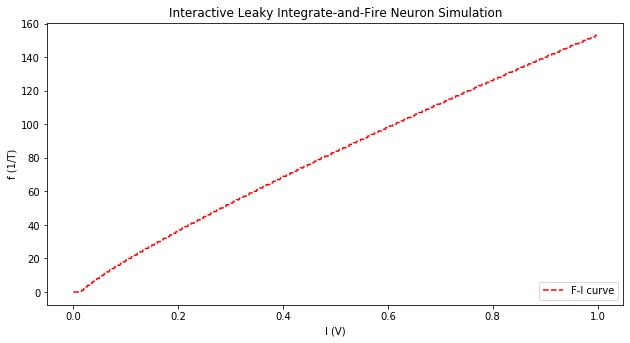

In [14]:
FI_curve(1,0.004)

### AELIF Neuron Simulation for Variable current based on time¶

In [15]:
def AELIF_Model2(I_init,gl_init,Cm_init,num_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # update functions for lines
    V , f ,I = AELIF(I_init=I_init, gl=gl_init, Cm=Cm_init, num=num_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.04

    ######### Plotting
    fig = plt.figure("Adaptive exponential leaky Integrate-and-Fire Neuron Model", figsize=(14, 14))
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.subplot(211)
    plt.title("Adaptive exponential leaky Integrate-and-Fire Neuron Model")
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    #plt.plot(time, I, label="Applied Current:I")[0]
    plt.plot(time, V, label="Potential:U")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    
    plt.subplot(212)
    plt.plot(time, I, label="Applied Current:I")
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("I(t) [V]")
    plt.xlabel("Time [s]")
    

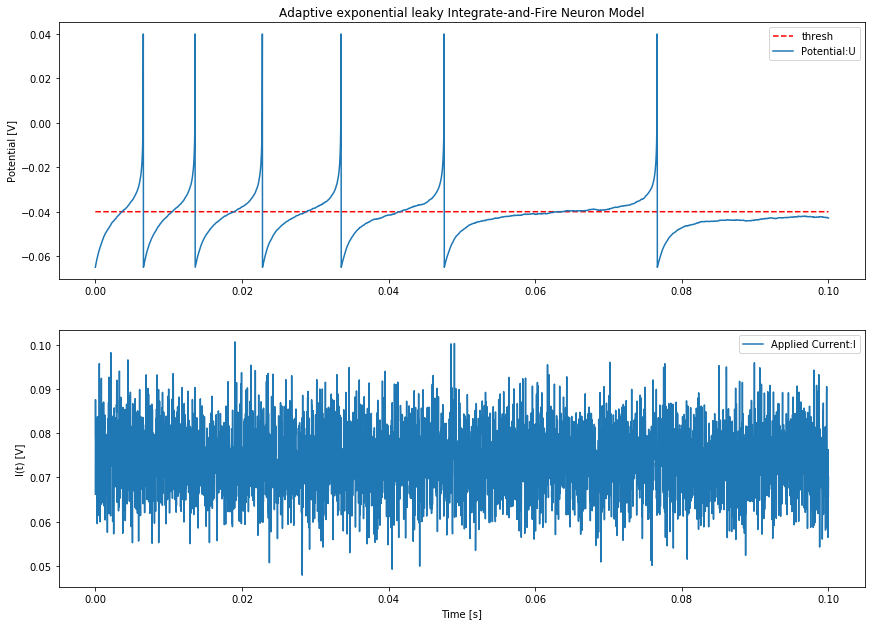

In [16]:
AELIF_Model2(0.074,4,0.0043,2)

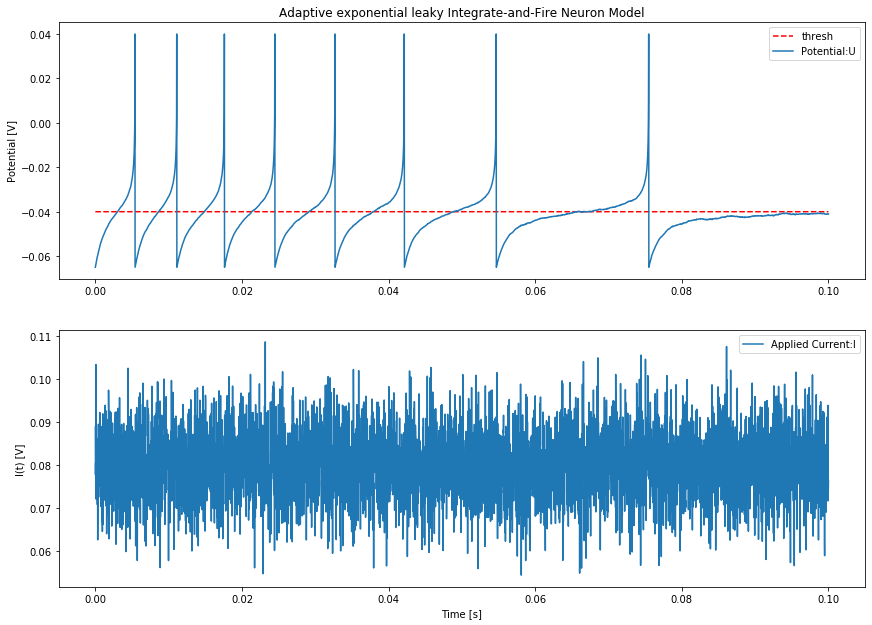

In [17]:
AELIF_Model2(0.08,4,0.0043,2)

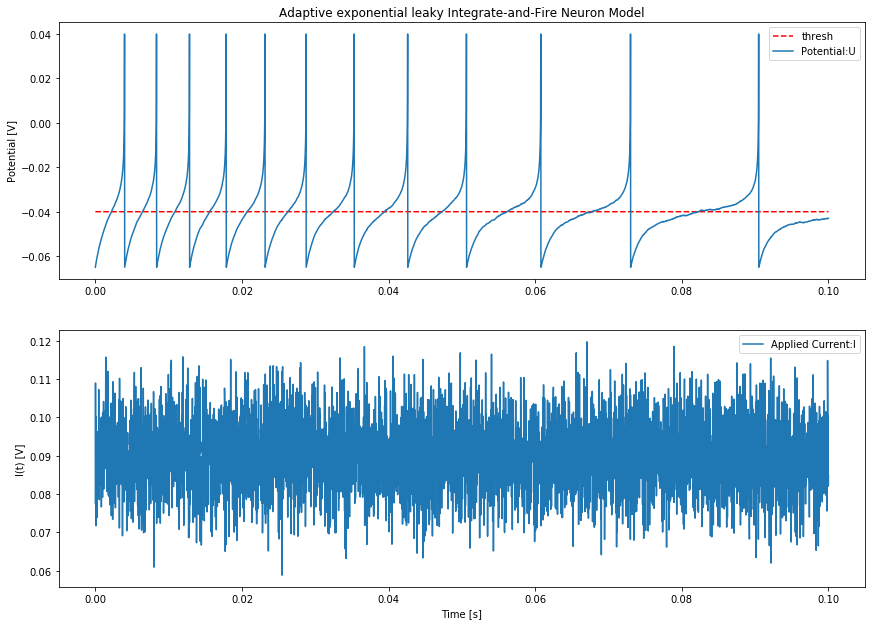

In [18]:
AELIF_Model2(0.09,4,0.0043,2)

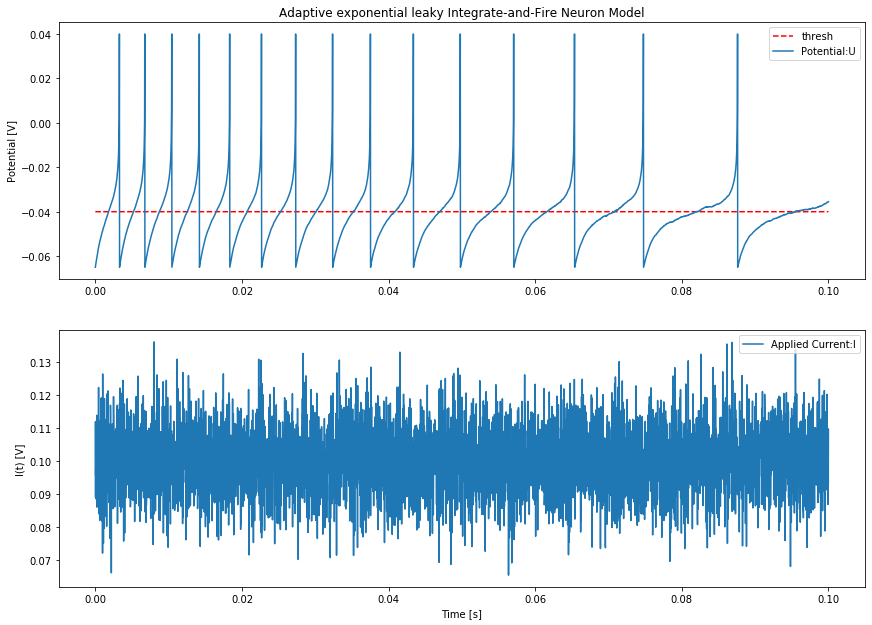

In [19]:
AELIF_Model2(0.1,4,0.0043,2)

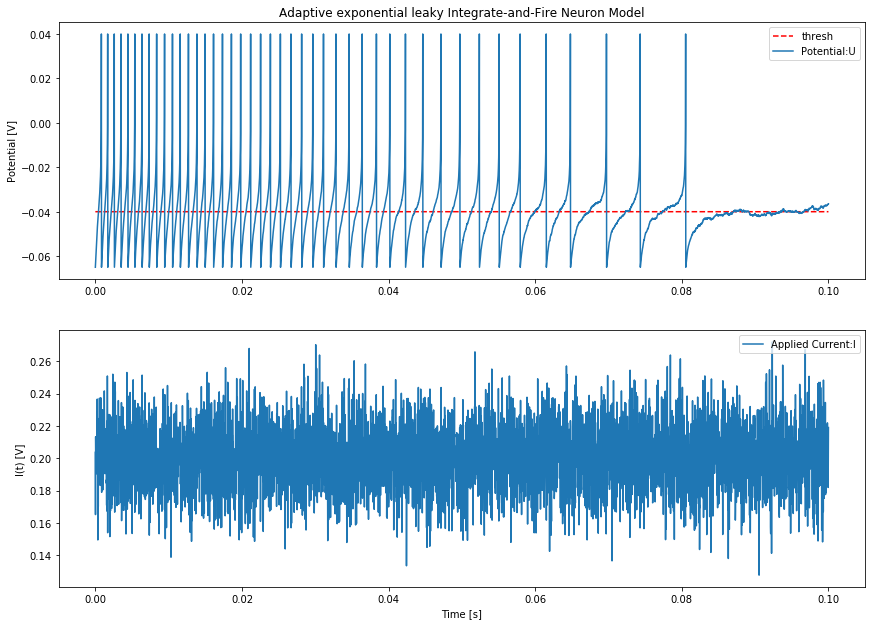

In [20]:
AELIF_Model2(0.2,6,0.0025,2)